In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import joblib
import graphviz
from sklearn.metrics import mean_absolute_error, r2_score, root_mean_squared_error

In [17]:
import os

# Tentukan folder tempat file Excel berada
folder_path = 'filled_dataset'

# List semua file Excel dalam folder
files = [f for f in os.listdir(folder_path) if f.endswith('.xlsx')]

# Gabungkan semua file Excel
df_list = [pd.read_excel(os.path.join(folder_path, file), index_col='Tanggal') for file in files]

# Gabungkan semua data menjadi satu DataFrame
df = pd.concat(df_list)
df.head()


,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ff_avg
Tanggal,,,,,,,,
2000-01-01,23.0,29.8,26.0,92,3.0,0.0,8,2
2000-01-02,24.0,29.7,26.1,91,14.0,2.2,8,2
2000-01-03,23.0,30.3,26.1,91,1.0,0.6,5,2
2000-01-04,24.0,29.6,24.4,97,25.0,2.7,6,0
2000-01-05,23.0,31.4,26.7,88,25.0,1.1,5,1


In [18]:
# Menyusun variabel
target_cols = [
    ('Tn', '°C'),
    ('Tx', '°C'),
    ('Tavg', '°C'),
    ('RH_avg', '%'),
    ('RR', 'mm'),
    ('ss', 'jam'),
    ('ff_x', 'm/s'),
    ('ff_avg', 'm/s')
]
var_list = ['Tn', 'Tx', 'Tavg', 'RH_avg', 'RR', 'ss', 'ff_x', 'ff_avg']
unit_list = ['°C', '°C', '°C', '%', 'mm', 'jam', 'm/s', 'm/s']


def preprocess_data(df, var):
    df = df.filter([var])
    return df

def create_dataset(dataset, var, time_steps=1):
    dataX, dataY = [], []
    
    # Separate features (including the target variable from past days) and the target
    features = dataset.values  # Includes all variables, including 'var'
    target = dataset[var].values  # Target variable column
    
    # Create the data with the specified time steps
    for i in range(len(features) - time_steps):
        # Get the window of features (all columns) for the current time step
        dataX.append(features[i:(i + time_steps), :])  # Includes all variables for past days
        # Target value is the value of 'var' just after the current time step
        dataY.append(target[i + time_steps])
    
    return np.array(dataX), np.array(dataY)



[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:  9.8min
[Parallel(n_jobs=8)]: Done  50 out of  50 | elapsed: 13.6min finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.


1 Tn
MAE: 0.5866145815207936
RMSE: 0.7657264656419054
R2: 0.567586542659691


[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:  7.6min
[Parallel(n_jobs=8)]: Done  50 out of  50 | elapsed: 10.5min finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.


2 Tx
MAE: 0.9092576996693925
RMSE: 1.2215147796411845
R2: 0.4138505036334763


[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:  7.3min
[Parallel(n_jobs=8)]: Done  50 out of  50 | elapsed: 10.2min finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.


3 Tavg
MAE: 0.7081684357055855
RMSE: 0.9123922994094023
R2: 0.5678862025907717


[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:  7.4min
[Parallel(n_jobs=8)]: Done  50 out of  50 | elapsed: 10.3min finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.


4 RH_avg
MAE: 3.0839907777971116
RMSE: 3.979768540853607
R2: 0.5336449495929796


[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:  9.3min
[Parallel(n_jobs=8)]: Done  50 out of  50 | elapsed: 12.8min finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.


5 RR
MAE: 9.601512789281363
RMSE: 20.015988099429045
R2: 0.004526956781880864


[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:  8.0min
[Parallel(n_jobs=8)]: Done  50 out of  50 | elapsed: 11.2min finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.


6 ss
MAE: 2.03049956499043
RMSE: 2.4673609484506107
R2: 0.3114406959725772


[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:  7.6min
[Parallel(n_jobs=8)]: Done  50 out of  50 | elapsed: 10.8min finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.


7 ff_x
MAE: 1.0369662432573516
RMSE: 1.4720496648431216
R2: 0.18014548075562276


[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:  8.5min
[Parallel(n_jobs=8)]: Done  50 out of  50 | elapsed: 11.8min finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  50 out of  50 | elapsed:    0.0s finished


8 ff_avg
MAE: 0.4401374630241865
RMSE: 0.6523411146604645
R2: 0.3365617099248749


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed: 44.3min
[Parallel(n_jobs=8)]: Done  50 out of  50 | elapsed: 62.0min finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.


9 Tn
MAE: 0.5871884461458151
RMSE: 0.7615225452440078
R2: 0.5723215016544818


[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:  8.1min
[Parallel(n_jobs=8)]: Done  50 out of  50 | elapsed: 11.2min finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.


10 Tx
MAE: 0.9436036192796243
RMSE: 1.2318027022773337
R2: 0.40393551119446647


[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:  7.7min
[Parallel(n_jobs=8)]: Done  50 out of  50 | elapsed: 10.7min finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.


11 Tavg
MAE: 0.723745954410997
RMSE: 0.9233081192480804
R2: 0.5574847719513762


[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:  8.1min
[Parallel(n_jobs=8)]: Done  50 out of  50 | elapsed: 11.2min finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.


12 RH_avg
MAE: 3.109587610927441
RMSE: 3.9976769245972665
R2: 0.5294384457416814


[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed: 23.4min
[Parallel(n_jobs=8)]: Done  50 out of  50 | elapsed: 33.0min finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.


13 RR
MAE: 11.692214285714284
RMSE: 19.320894508166596
R2: 0.07246588008698518


[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:  8.5min
[Parallel(n_jobs=8)]: Done  50 out of  50 | elapsed: 11.9min finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.


14 ss
MAE: 2.0335073081607793
RMSE: 2.4499999360624702
R2: 0.321096381361733


[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed: 21.5min
[Parallel(n_jobs=8)]: Done  50 out of  50 | elapsed: 33.2min finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.


15 ff_x
MAE: 1.094633721941883
RMSE: 1.501287000802476
R2: 0.14725473247251697


[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed: 39.1min
[Parallel(n_jobs=8)]: Done  50 out of  50 | elapsed: 54.7min finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  50 out of  50 | elapsed:    0.0s finished


16 ff_avg
MAE: 0.4876352879763355
RMSE: 0.6278710288623257
R2: 0.3854009013038797


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed: 21.0min
[Parallel(n_jobs=8)]: Done  50 out of  50 | elapsed: 29.8min finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.


17 Tn
MAE: 0.5818793418647167
RMSE: 0.7604408167272159
R2: 0.573626682664881


[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed: 16.5min
[Parallel(n_jobs=8)]: Done  50 out of  50 | elapsed: 23.2min finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.


18 Tx
MAE: 0.9042550709497693
RMSE: 1.2166149600425726
R2: 0.4185108995550202


[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed: 15.8min
[Parallel(n_jobs=8)]: Done  50 out of  50 | elapsed: 22.3min finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.


19 Tavg
MAE: 0.7040197614694872
RMSE: 0.9071953851230414
R2: 0.5729596151012559


[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed: 16.1min
[Parallel(n_jobs=8)]: Done  50 out of  50 | elapsed: 22.7min finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.


20 RH_avg
MAE: 3.0627047967267345
RMSE: 3.957341145552476
R2: 0.5389547981426425


[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed: 20.5min
[Parallel(n_jobs=8)]: Done  50 out of  50 | elapsed: 29.0min finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.


21 RR
MAE: 9.652408809959084
RMSE: 20.1117149783551
R2: -0.004466309275372504


[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed: 17.3min
[Parallel(n_jobs=8)]: Done  50 out of  50 | elapsed: 24.7min finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.


22 ss
MAE: 2.052730652041438
RMSE: 2.486821048666877
R2: 0.30032141566830384


[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed: 17.2min
[Parallel(n_jobs=8)]: Done  50 out of  50 | elapsed: 24.4min finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.


23 ff_x
MAE: 1.0266736310611997
RMSE: 1.4626752692081486
R2: 0.19080302137172878


[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed: 18.5min
[Parallel(n_jobs=8)]: Done  50 out of  50 | elapsed: 26.0min finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  50 out of  50 | elapsed:    0.0s finished


24 ff_avg
MAE: 0.4403438669800644
RMSE: 0.6459861066381619
R2: 0.3495801472442419


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed: 150.7min
[Parallel(n_jobs=8)]: Done  50 out of  50 | elapsed: 215.8min finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.


25 Tn
MAE: 0.5781859493340297
RMSE: 0.7525752126421525
R2: 0.5824014334506882


[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed: 16.2min
[Parallel(n_jobs=8)]: Done  50 out of  50 | elapsed: 22.4min finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.


26 Tx
MAE: 0.9364458083050404
RMSE: 1.224906308326027
R2: 0.41055808338295996


[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed: 15.3min
[Parallel(n_jobs=8)]: Done  50 out of  50 | elapsed: 21.3min finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.


27 Tavg
MAE: 0.7185111865587186
RMSE: 0.9181470049481296
R2: 0.5625869589349336


[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed: 16.1min
[Parallel(n_jobs=8)]: Done  50 out of  50 | elapsed: 22.3min finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.


28 RH_avg
MAE: 3.09260555410464
RMSE: 3.979296956208678
R2: 0.533824736543145


[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed: 69.7min
[Parallel(n_jobs=8)]: Done  50 out of  50 | elapsed: 98.7min finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.


29 RR
MAE: 11.976371724558195
RMSE: 19.494648828886575
R2: 0.05622602746695049


[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed: 16.7min
[Parallel(n_jobs=8)]: Done  50 out of  50 | elapsed: 23.5min finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.


30 ss
MAE: 2.0688455645512325
RMSE: 2.4883239771204906
R2: 0.2994754483926192


[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed: 60.1min
[Parallel(n_jobs=8)]: Done  50 out of  50 | elapsed: 84.6min finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.


31 ff_x
MAE: 1.0856333246278402
RMSE: 1.48991272049277
R2: 0.16038522620769569


[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed: 122.3min
[Parallel(n_jobs=8)]: Done  50 out of  50 | elapsed: 165.3min finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  50 out of  50 | elapsed:    0.0s finished


32 ff_avg
MAE: 0.4866675372159833
RMSE: 0.628064337784452
R2: 0.3851690770779488


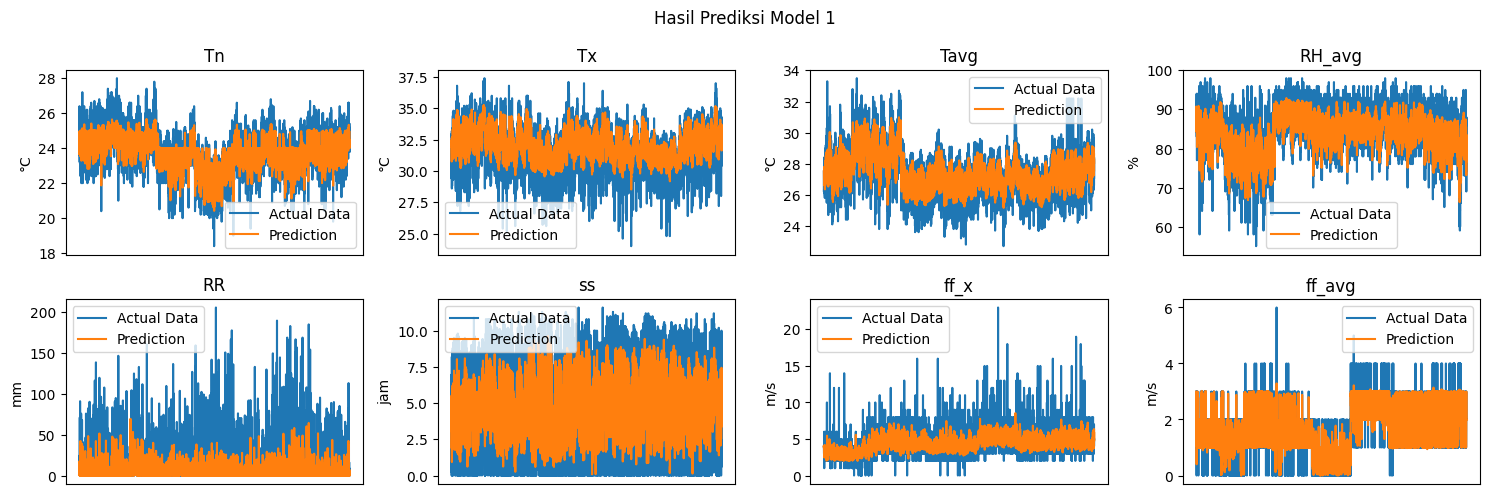

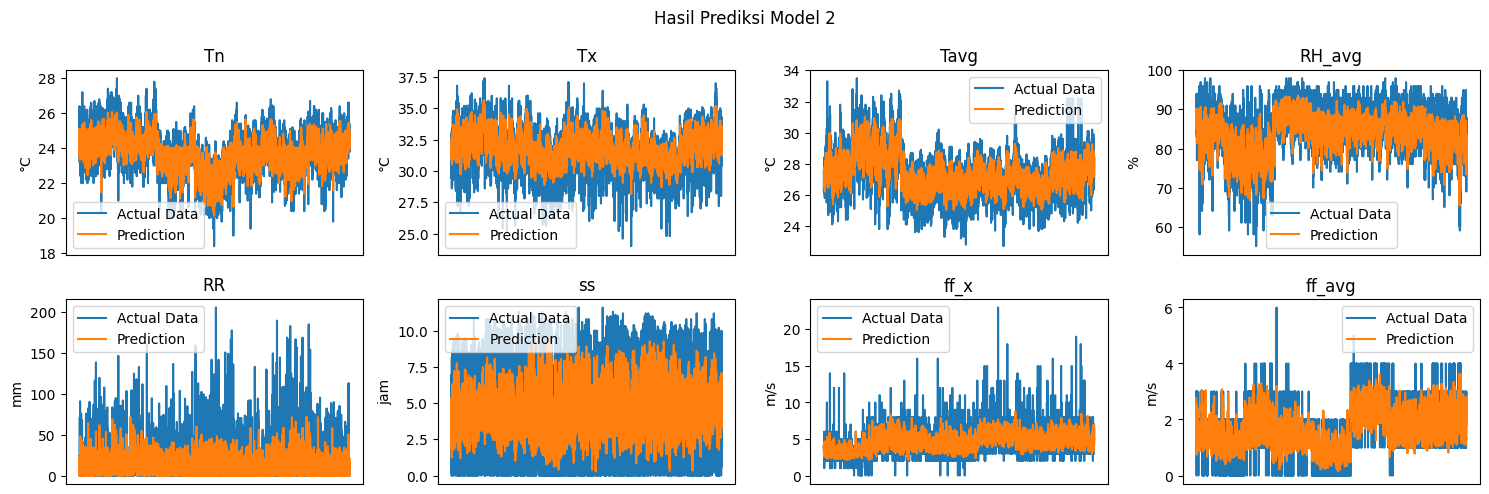

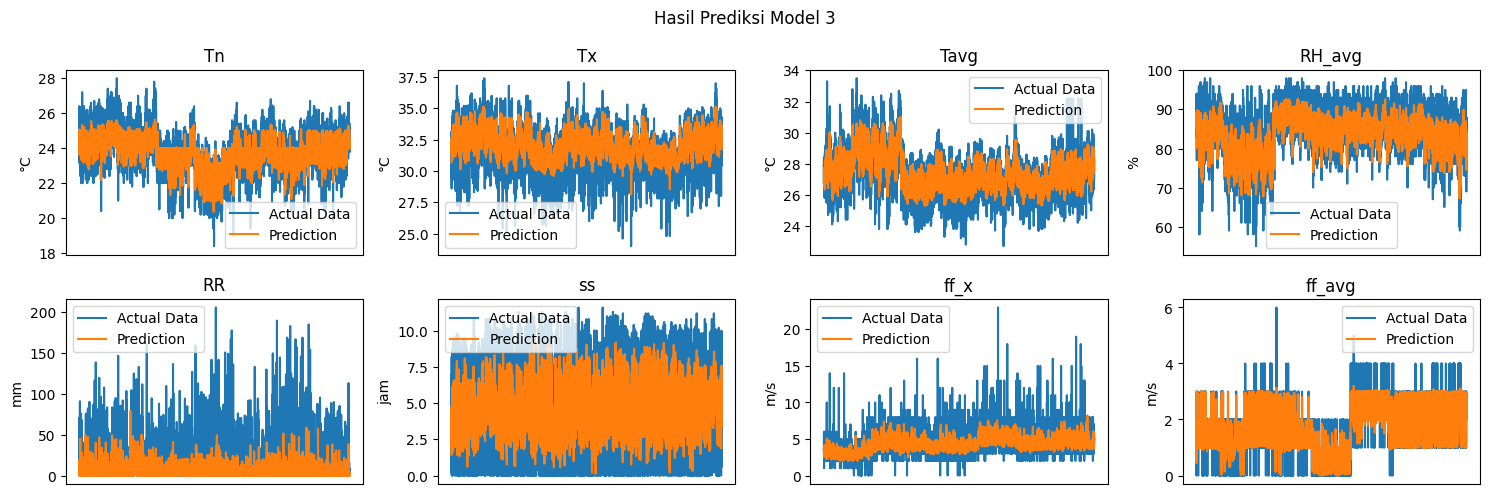

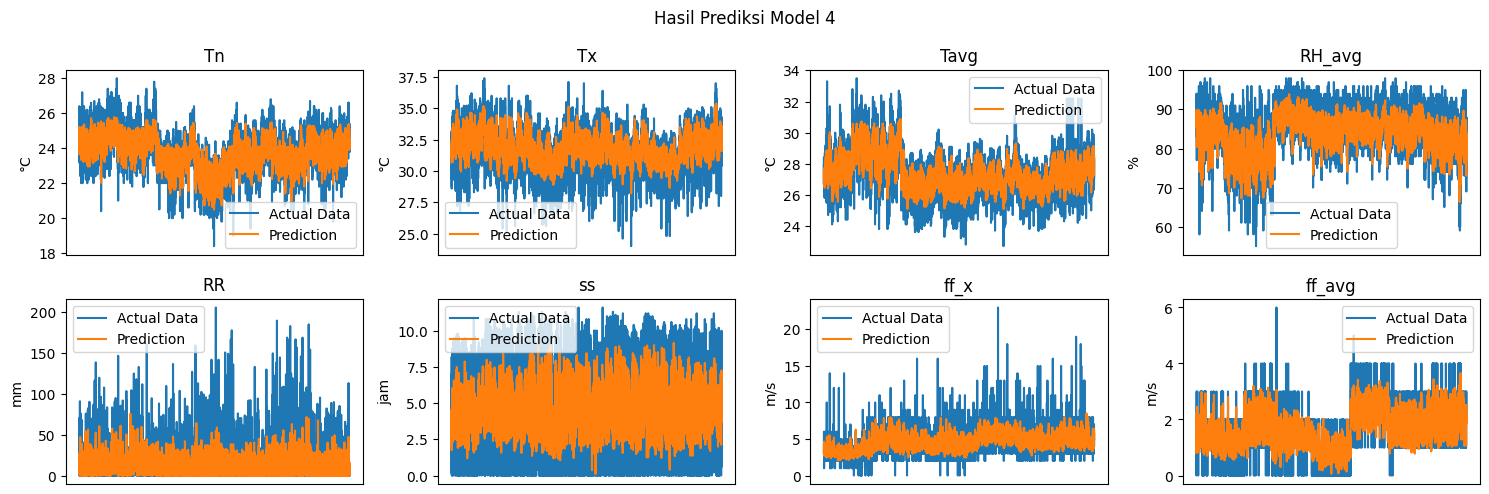

In [19]:
# tree_count = [50, 100, 200]
# tree_depth = [None, 10, 20]
# tree_feature = ["sqrt", "log2", None]
# timesteps = [1, 3, 8, 30]
# min_samples_splits = [5, 8, 10]
# min_samples_leaf = [3, 4, 5]

tree_count = [50]
tree_depth = [10, None]
tree_feature = [None]
timesteps = [7, 14]
min_samples_splits = [5]
min_samples_leaf = [3]


# bootstrap_sample = []

# time_step = 8

# Melatih dan membuat prediksi untuk setiap komoditas

history_dict = {}

# Assuming you are selecting 8 columns from the dataset
selected_columns = df.columns[:8]  # Example: Select the first 8 columns (adjust this as per your dataset)

# Dictionary to store the loss metrics for each configuration
results = []
test_count = 0
index_counter = 0

for time_step in timesteps:
        for feature in tree_feature:
            for depth in tree_depth:
                for splits in min_samples_splits:
                      for leaf in min_samples_leaf:
                            for count in tree_count:    
                                all_actuals = []
                                all_predictions = []
                                index_counter += 1
                                for col, unit in target_cols:
                                    try:

                                        
                                        df_col = df[selected_columns]

                                        # Choose the cutoff date (e.g., '2023-01-01')
                                        cutoff_date = pd.to_datetime('2020-01-01')

                                        # Split the data
                                        train = df_col[df_col.index < cutoff_date]
                                        test = df_col[df_col.index >= cutoff_date]

                                        # Membuat data latih untuk model RandomForest dengan multiple features (8 columns)
                                        X_train, y_train = create_dataset(train, col, time_steps=time_step)
                                        X_test, y_test = create_dataset(test, col, time_steps=time_step)

                                        # Reshape for RandomForest
                                        X_train = X_train.reshape(X_train.shape[0], -1)
                                        X_test = X_test.reshape(X_test.shape[0], -1)

                                        # Membangun model RandomForestRegressor
                                        model = RandomForestRegressor(
                                                    n_estimators=count, 
                                                    n_jobs=8,
                                                    random_state=42, 
                                                    criterion='absolute_error',
                                                    max_depth= depth,
                                                    max_features=feature,
                                                    verbose=1,
                                                )

                                        # Melatih model RandomForest
                                        model.fit(X_train, y_train)

                                        # Menyimpan model dalam dictionary
                                        history_dict[col] = model

                                        # Melakukan prediksi menggunakan data test set
                                        y_pred = model.predict(X_test)

                                        # Mengembalikan target (y) ke skala aslinya
                                        y_test = y_test.reshape(-1, 1)
                                        y_pred = y_pred.reshape(-1, 1)

                                        all_actuals.append(y_test.flatten())
                                        all_predictions.append(y_pred.flatten())

                                        # # Membuat plot hasil prediksi dengan sumbu x sesuai bulan dan tahun
                                        # plt.figure(figsize=(10, 5))
                                        # plt.plot(y_test.flatten(), label='Actual Data')
                                        # plt.plot(y_pred.flatten(), label='Prediction')
                                        # plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
                                        # plt.legend()
                                        # plt.title('The Forecasting Result ' + col + ' Using RandomForest')
                                        # plt.ylabel('Value in '+ unit)
                                        # plt.show()

                                        # Plot grafik nilai loss
                                        # plt.figure(figsize=(15, 5))
                                        # plt.subplot(1, 2, 1)
                                        # plt.plot(history_dict[col].feature_importances_, label='Feature Importance')
                                        # plt.title('Feature Importance ' + col)
                                        # plt.xlabel('Feature')
                                        # plt.ylabel('Importance')
                                        # plt.legend()
                                        # plt.show()
                                        # plt.figure(figsize=(15, 5))
                                        # plt.subplot(1, 2, 1)
                                        # plt.bar(range(len(selected_columns.drop(col))), history_dict[col].feature_importances_, tick_label=selected_columns.drop(col))
                                        # plt.title('Feature Importance ' + col)
                                        # plt.xlabel('Feature')
                                        # plt.ylabel('Importance')
                                        # plt.show()

                                        # Menghitung metrik evaluasi MAE, MAPE, MSE, RMSE, dan Coefficient of Variation (CV)
                                        
                                        test_count += 1
                                        print(str(test_count) + ' ' + col)

                                        # Menghitung MAE
                                        mae = mean_absolute_error(y_test, y_pred)
                                        print('MAE:', mae)

                                        # Menghitung RMSE
                                        rmse = root_mean_squared_error(y_test, y_pred)
                                        print('RMSE:', rmse)

                                        # Menghitung Coefficient of Determination (R^2)
                                        r2 = r2_score(y_test, y_pred)
                                        print('R2:', r2)


                                        # Storing the results
                                        results.append({
                                            'model': index_counter,
                                            'time_step': time_step,
                                            'feature':col,
                                            'N_estimator': count,
                                            'max_depth': depth,
                                            'min_samples_splits':splits,
                                            'min_samples_leaf':leaf,
                                            'max_feature': feature,
                                            'MAE': mae,
                                            'RMSE': rmse,
                                            'R²': r2
                                        })
                                        
                                        joblib.dump(model, f'rf_model_2/{index_counter}_{col}.joblib')

                                        # break

                                    except Exception as e:
                                                    # Log the error for this configuration, but continue
                                                    print(f"Error: {str(e)}")
                                                    continue
                                # Menentukan jumlah baris dan kolom subplot
                                num_rows = 2  # Jumlah baris
                                num_cols = 4  # Jumlah kolom

                                # Membuat subplot dengan layout yang ditentukan
                                fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5))
                                fig.suptitle(f'Hasil Prediksi Model {index_counter}')
                                for i, ax in enumerate(axes.flat):
                                    ax.plot(all_actuals[i], label='Actual Data')
                                    ax.plot(all_predictions[i], label='Prediction')
                                    ax.set_title(var_list[i])
                                    ax.set_ylabel(unit_list[i])
                                    # ax.tick_params(axis='x', rotation=45)
                                    ax.legend()
                                    ax.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
                                    

                                # Mengatur tampilan subplot agar tidak terlalu rapat
                                plt.tight_layout()

                                # Menampilkan gambar
                                # plt.show()
                                plt.savefig(f'gambar_pred_rf/model_rf_{index_counter}.png')
                                    
# Convert the results list into a Pandas DataFrame
results_df = pd.DataFrame(results)

files = [f for f in os.listdir('rf_result') if f.endswith('.xlsx')]

# Save the DataFrame to an Excel file
output_path = f'rf_result/model_results_with_errors_rf_{len(files) + 1}.xlsx'
results_df.to_excel(output_path, index=False)